In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def train_val_generators(training_dir, validation_dir):
  train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  train_generator = train_datagen.flow_from_directory(
      directory=train_dir,
      batch_size=20,
      class_mode='categorical',
      target_size=(150, 150)
  )

  val_datagen = ImageDataGenerator(rescale=1/255)

  val_generator = val_datagen.flow_from_directory(
      directory=val_dir,
      batch_size=2,
      class_mode='categorical',
      target_size=(150, 150)
  )

  return train_generator, val_generator

In [3]:
train_dir = 'dataset/train/'
val_dir = 'dataset/validation/'
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 2271 images belonging to 22 classes.
Found 102 images belonging to 22 classes.


In [4]:
train_generator.class_indices

{'anggur': 0,
 'apel': 1,
 'ayam': 2,
 'brokoli': 3,
 'cap cay': 4,
 'ikan': 5,
 'jamur crispy': 6,
 'kentang': 7,
 'mie': 8,
 'nasi': 9,
 'nasi goreng': 10,
 'pempek kapal selam': 11,
 'pisang goreng': 12,
 'rawon': 13,
 'rendang': 14,
 'roti': 15,
 'sate ayam': 16,
 'sate usus': 17,
 'sosis': 18,
 'soto ayam': 19,
 'telur mata sapi': 20,
 'wortel': 21}

In [5]:
validation_generator.class_indices

{'anggur': 0,
 'apel': 1,
 'ayam': 2,
 'brokoli': 3,
 'cap cay': 4,
 'ikan': 5,
 'jamur crispy': 6,
 'kentang': 7,
 'mie': 8,
 'nasi': 9,
 'nasi goreng': 10,
 'pempek kapal selam': 11,
 'pisang goreng': 12,
 'rawon': 13,
 'rendang': 14,
 'roti': 15,
 'sate ayam': 16,
 'sate usus': 17,
 'sosis': 18,
 'soto ayam': 19,
 'telur mata sapi': 20,
 'wortel': 21}

In [6]:
class_names = []
for category in train_generator.class_indices:
  class_names.append(category)
print(class_names)

['anggur', 'apel', 'ayam', 'brokoli', 'cap cay', 'ikan', 'jamur crispy', 'kentang', 'mie', 'nasi', 'nasi goreng', 'pempek kapal selam', 'pisang goreng', 'rawon', 'rendang', 'roti', 'sate ayam', 'sate usus', 'sosis', 'soto ayam', 'telur mata sapi', 'wortel']


In [7]:
# Download the pre-trained weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
# Import model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Set the weights file
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model = InceptionV3(input_shape=(150,150,3),
                               include_top = False,
                               weights = None)

# Load the pre-trained weights
pretrained_model.load_weights(local_weights_file)

# Freeze the weights of the layers
for layer in pretrained_model.layers:
  layer.trainable = False

In [9]:
# Choose 'mixed_7' as the last layer of base model
last_layer = pretrained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [10]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(22, activation='softmax')(x)

# Append the dense network to the base model
model = tf.keras.Model(pretrained_model.input, outputs)
model.summary()



'''
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)

# Add a final softmax layer for classification
x = tf.keras.layers.Dense(9, activation='softmax')(x)

# Append the dense network to the base model
model = tf.keras.Model(pretrained_model.input, x)
model.summary()
'''

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

"\n# Add a dropout rate of 0.2\nx = tf.keras.layers.Dropout(0.2)(x)\n\n# Add a final softmax layer for classification\nx = tf.keras.layers.Dense(9, activation='softmax')(x)\n\n# Append the dense network to the base model\nmodel = tf.keras.Model(pretrained_model.input, x)\nmodel.summary()\n"

In [11]:
'''
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(101, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


print(model.summary())
'''

"\ninputs = pretrained_model.input\n\nx = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)\nx = tf.keras.layers.Dense(128, activation='relu')(x)\n\noutputs = tf.keras.layers.Dense(101, activation='softmax')(x)\n\nmodel = tf.keras.Model(inputs, outputs)\n\n\nprint(model.summary())\n"

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator,
    verbose = 1,
)

Epoch 1/50
114/114 [==============================] - 76s 662ms/step - loss: 1.6712 - accuracy: 0.4892 - val_loss: 0.8943 - val_accuracy: 0.7353
Epoch 2/50
114/114 [==============================] - 70s 616ms/step - loss: 1.0243 - accuracy: 0.6878 - val_loss: 0.6255 - val_accuracy: 0.7843
Epoch 3/50
114/114 [==============================] - 72s 630ms/step - loss: 0.8606 - accuracy: 0.7248 - val_loss: 0.4114 - val_accuracy: 0.8725
Epoch 4/50
114/114 [==============================] - 64s 560ms/step - loss: 0.7452 - accuracy: 0.7622 - val_loss: 0.5309 - val_accuracy: 0.8137
Epoch 5/50
114/114 [==============================] - 63s 556ms/step - loss: 0.7335 - accuracy: 0.7812 - val_loss: 0.5453 - val_accuracy: 0.8431
Epoch 6/50
114/114 [==============================] - 67s 585ms/step - loss: 0.6136 - accuracy: 0.8005 - val_loss: 0.4115 - val_accuracy: 0.8824
Epoch 7/50
114/114 [==============================] - 66s 575ms/step - loss: 0.5872 - accuracy: 0.8155 - val_loss: 0.5048 - val_ac

# Plotting Accuracy and Loss

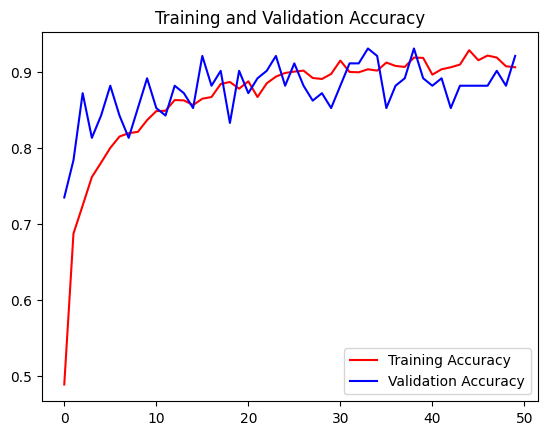

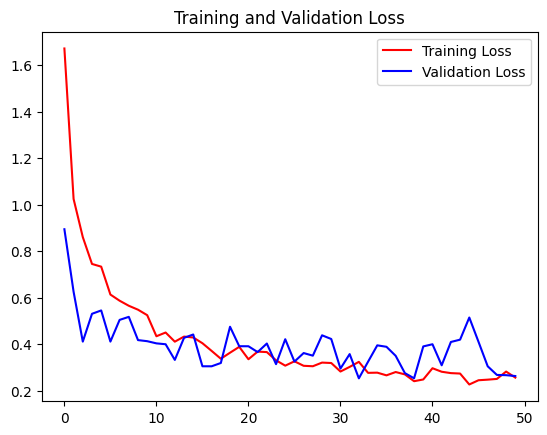

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

# Accuracy
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

# Loss
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [18]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


In [19]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('improved_model.tflite', 'wb') as f:
  f.write(tflite_model)

In [45]:
# Convert model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = "foodClassification_default.tflite"

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [57]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from tensorflow.keras.utils import load_img, img_to_array


labels = ['Anggur', 'Apel', 'Ayam Goreng', 'Brokoli', 'Cap Cay', 'Ikan Bakar', 'Jamur Crispy', 'Kentang', 'Mie Goreng', 'Nasi Putih', 'Nasi Goreng', 'Pempek Kapal Selam', 'Pisang Goreng', 'Rawon', 'Rendang', 'Roti', 'Sate Ayam', 'Sate Usus', 'Sosis', 'Soto Ayam', 'Telur Mata Sapi', 'Wortel']

# predicting images
path = 'test_images/WhatsApp Image 2023-06-12 at 9.58.50 PM.jpeg'
img = load_img(path, target_size=(150, 150))
x=img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
result = np.argmax(classes)
print(classes[0])
print(f'\nlabels[{result}] = {classes[0,result]}')
print(labels[result])

1/1 [==============================] - 0s 66ms/step
[1.2317819e-16 1.0021037e-17 8.1467260e-09 4.3638631e-17 2.3884605e-13
 2.5339769e-10 5.2605820e-13 2.9429274e-20 9.8591366e-09 5.8796388e-17
 2.6445532e-08 1.5414605e-11 9.4647597e-13 6.7823312e-05 9.9993193e-01
 7.0383418e-19 5.6187561e-09 3.8595644e-11 2.9834453e-12 1.9607600e-09
 2.0058592e-07 9.4222714e-24]

labels[14] = 0.9999319314956665
Rendang


Found 2271 images belonging to 22 classes.


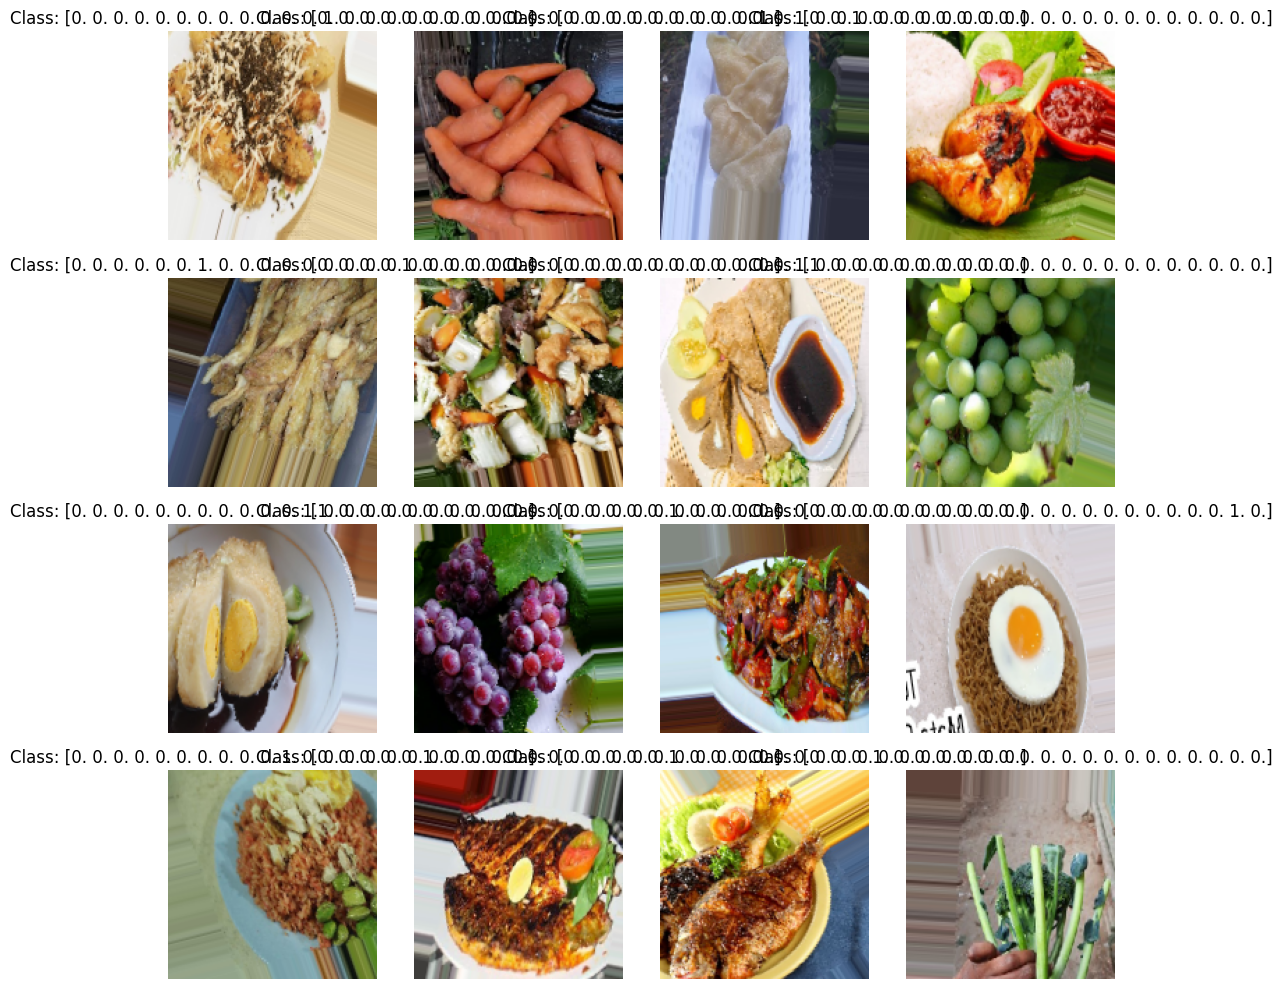

In [41]:
import matplotlib.pyplot as plt

# Assuming you already have a data generator set up
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

# Assuming you have a batch of augmented images
batch_size = 20
augmented_data = datagen.flow_from_directory(
    'dataset/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Generate a batch of augmented images
images, labels = augmented_data.next()

# Plot the augmented images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(images[i].astype('uint8'))
    ax.axis('off')
    ax.set_title('Class: {}'.format(labels[i]))
plt.tight_layout()
plt.show()